## Uppgift 2 - Sport statistics

Date: 2021-11-10

Choose 2-4 sports and create suitable graphs / diagrams to visualize for example:
- medal distribution between countries in sports
- age distribution in sports
- Create more plots to visualize different aspects of the sport.

In [1]:
import pandas as pd

import dash
from dash import dcc, html
from dash.dependencies import Output, Input
import dash_bootstrap_components as dbc

import plotly_express as px
import seaborn as sns
from matplotlib import pyplot as plt

import analyze_functions as af

**Medal distribution between countries for all sport**

In [2]:
# Import data
athlete_regions = pd.read_csv("data/athlete_regions.csv")
athlete_regions.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,_merge
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,both
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,both
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,both
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,both
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,both


In [3]:
# get noc_iso data
noc_iso = pd.read_csv("data/noc_iso.csv")
noc_iso = noc_iso.iloc[:, 1:]
noc_iso.head()

,Country,NOC,ISO
0,Afghanistan,AFG,AFG
1,Albania,ALB,ALB
2,Algeria,ALG,DZA
3,American Samoa,ASA,ASM
4,Andorra,AND,AND


In [4]:
# for all sports
df = af.count_medals(athlete_regions, "region")
print(df.head())
top10_region = df.head(10)

Medal    Bronze  Gold  Silver  Total
region                              
USA        1358  2638    1641   5637
Russia     1178  1599    1170   3947
Germany    1260  1301    1195   3756
UK          651   678     739   2068
France      666   501     610   1777


In [5]:
fig = px.bar(top10_region, y=top10_region.index, x=top10_region.columns,
             title="top 10 countries by sum of medals")
fig.update_layout(barmode='group')
fig.show()


The sports that we are going to check are: ice hockey, tennis, swimming, and fotboll

**Medal distribution for specific sport over countries**

In [11]:
sports = ["Ice Hockey", "Tennis", "Swimming", "Football" ]
for sport in sports:
    df_sport = athlete_regions[athlete_regions["Sport"] == sport]
    print(f"The dataframe has a shape: {df_sport.shape}")

    # use sub_df module to get sub dataframe of choosen arg: "region"
    # select the countries which had medals in history and sort by total medals descending
    medals_sport= af.count_medals(df_sport, "region")
    top10_medals_sport = medals_sport.head(10)
    
    # plot:

    fig = px.bar(top10_medals_sport, y=top10_medals_sport.index, x=top10_medals_sport.columns,
             title=f"Distribution of {sport} medals over countries")
    fig.update_layout(barmode='group')
    fig.show()
    fig.write_html(
            f"Visualiseringar/Q2.{sport}_country.html", auto_open=True)
    

The dataframe has a shape: (5516, 18)


The dataframe has a shape: (2862, 18)


The dataframe has a shape: (23195, 18)


The dataframe has a shape: (6745, 18)


**Medal distribution of a specific sport over years**

In [7]:
df = af.count_medals_n(athlete_regions, "NOC", "Year")
df_iso = df.merge(noc_iso, on="NOC", how="left")
df_iso = df_iso.sort_values(by=["Year", "NOC"])
df_iso.head()

,NOC,Year,Bronze,Gold,Silver,Total,Country,ISO
36,AUS,1896,1,2,0,3,Australia,AUS
69,AUT,1896,2,2,1,5,Austria,AUT
319,DEN,1896,3,1,2,6,Denmark,DNK
444,FRA,1896,2,5,4,11,France,FRA
486,GBR,1896,3,3,3,9,United Kingdom,GBR


In [8]:
for medal in ["Total", "Gold", "Silver","Bronze"]:

    fig = px.choropleth(df_iso, locations="ISO",
                        color=medal,
                        scope=None,
                        hover_name="Country",
                        animation_frame="Year",
                        title = f"Geographic map on {medal} medals in the 120 Olympics history", 
                        range_color=[0,df[medal].quantile(0.8)],
                        color_continuous_scale=px.colors.sequential.Plasma)
    
    
    fig["layout"].pop("updatemenus")
    fig.show()
    fig.write_html(f'Visualiseringar/Q2.plot_{medal}_on_map.html', auto_open=True)


**Medal Distribution over ages**

In [9]:
sports = ["Ice Hockey", "Tennis", "Swimming", "Football" ]
for sport in sports:
    df_sport = athlete_regions[athlete_regions["Sport"] == sport]
    print(f"The dataframe has a shape: {df_sport.shape}")

    # use sub_df module to get sub dataframe of choosen arg: "region"
    # select the countries which had medals in history and sort by total medals descending
    medals_sport= af2.count_medals(df_sport, "Age")
    print(f"The ages win medals of {sport} are: {medals_sport.index.unique()}")
    print(f"The most common ages to win medals in Olympics are:")
    print(medals_sport.head(10))

    # plot:

    fig = px.histogram(medals_sport, x=medals_sport.index, y=medals_sport.columns,
             title=f"Distribution of {sport} medals over ages")
    fig.update_layout(barmode='group')
    fig.show()
    fig.write_html(
            f"Visualiseringar/Q2.{sport}_age.html", auto_open=True)

The dataframe has a shape: (5516, 18)


NameError: name 'af2' is not defined

**Medal distribution among gender**

In [ ]:
sports = ["Ice Hockey", "Tennis", "Swimming", "Football" ]
for sport in sports:
    df_sport = athlete_regions[athlete_regions["Sport"] == sport]
    print(f"The dataframe has a shape: {df_sport.shape}")

    # use sub_df module to get sub dataframe of choosen arg: "region"
    # select the countries which had medals in history and sort by total medals descending
    medals_sport= af.count_medals(df_sport, "Sex")
    print(f"The gender of winners of medals in Olympics are:")
    print(medals_sport.head(10))

    # plot:

    fig = px.bar(medals_sport, x=medals_sport.index, y=medals_sport.columns,
             title=f"Distribution of {sport} medals over gender")
    fig.update_layout(barmode='group')
    fig.show()
    fig.write_html(
            f"Visualiseringar/Q2.{sport}_gender.html", auto_open=True)

The dataframe has a shape: (5516, 18)
The gender of winners of medals in Olympics are:
Medal  Bronze  Gold  Silver  Total
Sex                               
M         409   407     414   1230
F          98   101     101    300


The dataframe has a shape: (2862, 18)
The gender of winners of medals in Olympics are:
Medal  Bronze  Gold  Silver  Total
Sex                               
M          76    62      62    200
F          52    44      44    140


The dataframe has a shape: (23195, 18)
The gender of winners of medals in Olympics are:
Medal  Bronze  Gold  Silver  Total
Sex                               
M         527   606     541   1674
F         429   493     452   1374


The dataframe has a shape: (6745, 18)
The gender of winners of medals in Olympics are:
Medal  Bronze  Gold  Silver  Total
Sex                               
M         441   414     414   1269
F         102   101      99    302


- The gender differences are quite large in Ice hockey and football games, compare to tennis and swimming.

**Medal distribution over height**
- show gender difference

In [ ]:
sports = ["Ice Hockey", "Tennis", "Swimming", "Football" ]
for sport in sports:
    df_sport = athlete_regions[athlete_regions["Sport"] == sport]
    print(f"The dataframe has a shape: {df_sport.shape}")

    # use sub_df module to get sub dataframe of choosen arg: "region"
    # select the countries which had medals in history and sort by total medals descending
    medals_sport= af.count_medals_n(df_sport, "Sex", "Height")
    print(f"The common heigts of winners of medals in Olympics are:")
    print(medals_sport.head(10))
    
    medals_sport_f = medals_sport[medals_sport["Sex"]=="F"]

    fig = px.bar(medals_sport_f, x="Height", y=["Gold", "Silver", "Bronze", "Total"],
                title=f"Distribution of {sport} medals over height for female")
    fig.update_layout(barmode='group')
    fig.show()
    fig.write_html(
                f"Visualiseringar/Q2.{sport}_height_female.html", auto_open=True)

    medals_sport_m = medals_sport[medals_sport["Sex"]=="M"]
    fig = px.histogram(medals_sport_m, x="Height", y=["Gold", "Silver", "Bronze", "Total"],
                title=f"Distribution of {sport} medals over height for male")
    fig.update_layout(barmode='group')
    fig.show()
    fig.write_html(
                f"Visualiseringar/Q2.{sport}_height_male.html", auto_open=True)

The dataframe has a shape: (5516, 18)
The common heigts of winners of medals in Olympics are:
Medal Sex  Height  Bronze  Gold  Silver  Total
0       F   152.0       0     0       1      1
1       F   153.0       1     0       0      1
2       F   155.0       0     1       0      1
3       F   157.0       1     1       2      4
4       F   159.0       4     0       0      4
5       F   160.0       6     1       2      9
6       F   161.0       1     0       0      1
7       F   162.0       8     0       0      8
8       F   163.0       8    13       7     28
9       F   164.0       3     1       0      4


The dataframe has a shape: (2862, 18)
The common heigts of winners of medals in Olympics are:
Medal Sex  Height  Bronze  Gold  Silver  Total
0       F   162.0       1     1       0      2
1       F   163.0       1     0       1      2
2       F   164.0       3     0       2      5
3       F   165.0       1     0       0      1
4       F   166.0       1     0       0      1
5       F   167.0       0     1       0      1
6       F   168.0       0     1       0      1
7       F   169.0       3     0       4      7
8       F   170.0       2     3       4      9
9       F   171.0       2     0       0      2


The dataframe has a shape: (23195, 18)
The common heigts of winners of medals in Olympics are:
Medal Sex  Height  Bronze  Gold  Silver  Total
0       F   142.0       1     0       0      1
1       F   150.0       1     0       0      1
2       F   152.0       0     0       1      1
3       F   155.0       0     0       1      1
4       F   157.0       1     1       1      3
5       F   158.0       2     0       0      2
6       F   159.0       1     2       0      3
7       F   160.0       6     9       7     22
8       F   161.0       3     1       2      6
9       F   162.0       3     4       7     14


The dataframe has a shape: (6745, 18)
The common heigts of winners of medals in Olympics are:
Medal Sex  Height  Bronze  Gold  Silver  Total
0       F   153.0       2     1       1      4
1       F   154.0       0     0       1      1
2       F   155.0       0     1       3      4
3       F   156.0       1     0       1      2
4       F   157.0       0     0       4      4
5       F   158.0       0     1       0      1
6       F   159.0       0     0       1      1
7       F   160.0       5     2       2      9
8       F   161.0       1     0       3      4
9       F   162.0       0     0      10     10


---
**Athletes distribution in specific sport**

In [ ]:
# Data: all sports, User choose Gold
gold = athlete_regions[(athlete_regions.Medal == 'Gold')]
gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,_merge
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,both
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,both
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN,both
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN,both
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN,both


In [ ]:
gold = gold[gold['Age'].notna()]
gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,_merge
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,both
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,both
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN,both
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN,both
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN,both


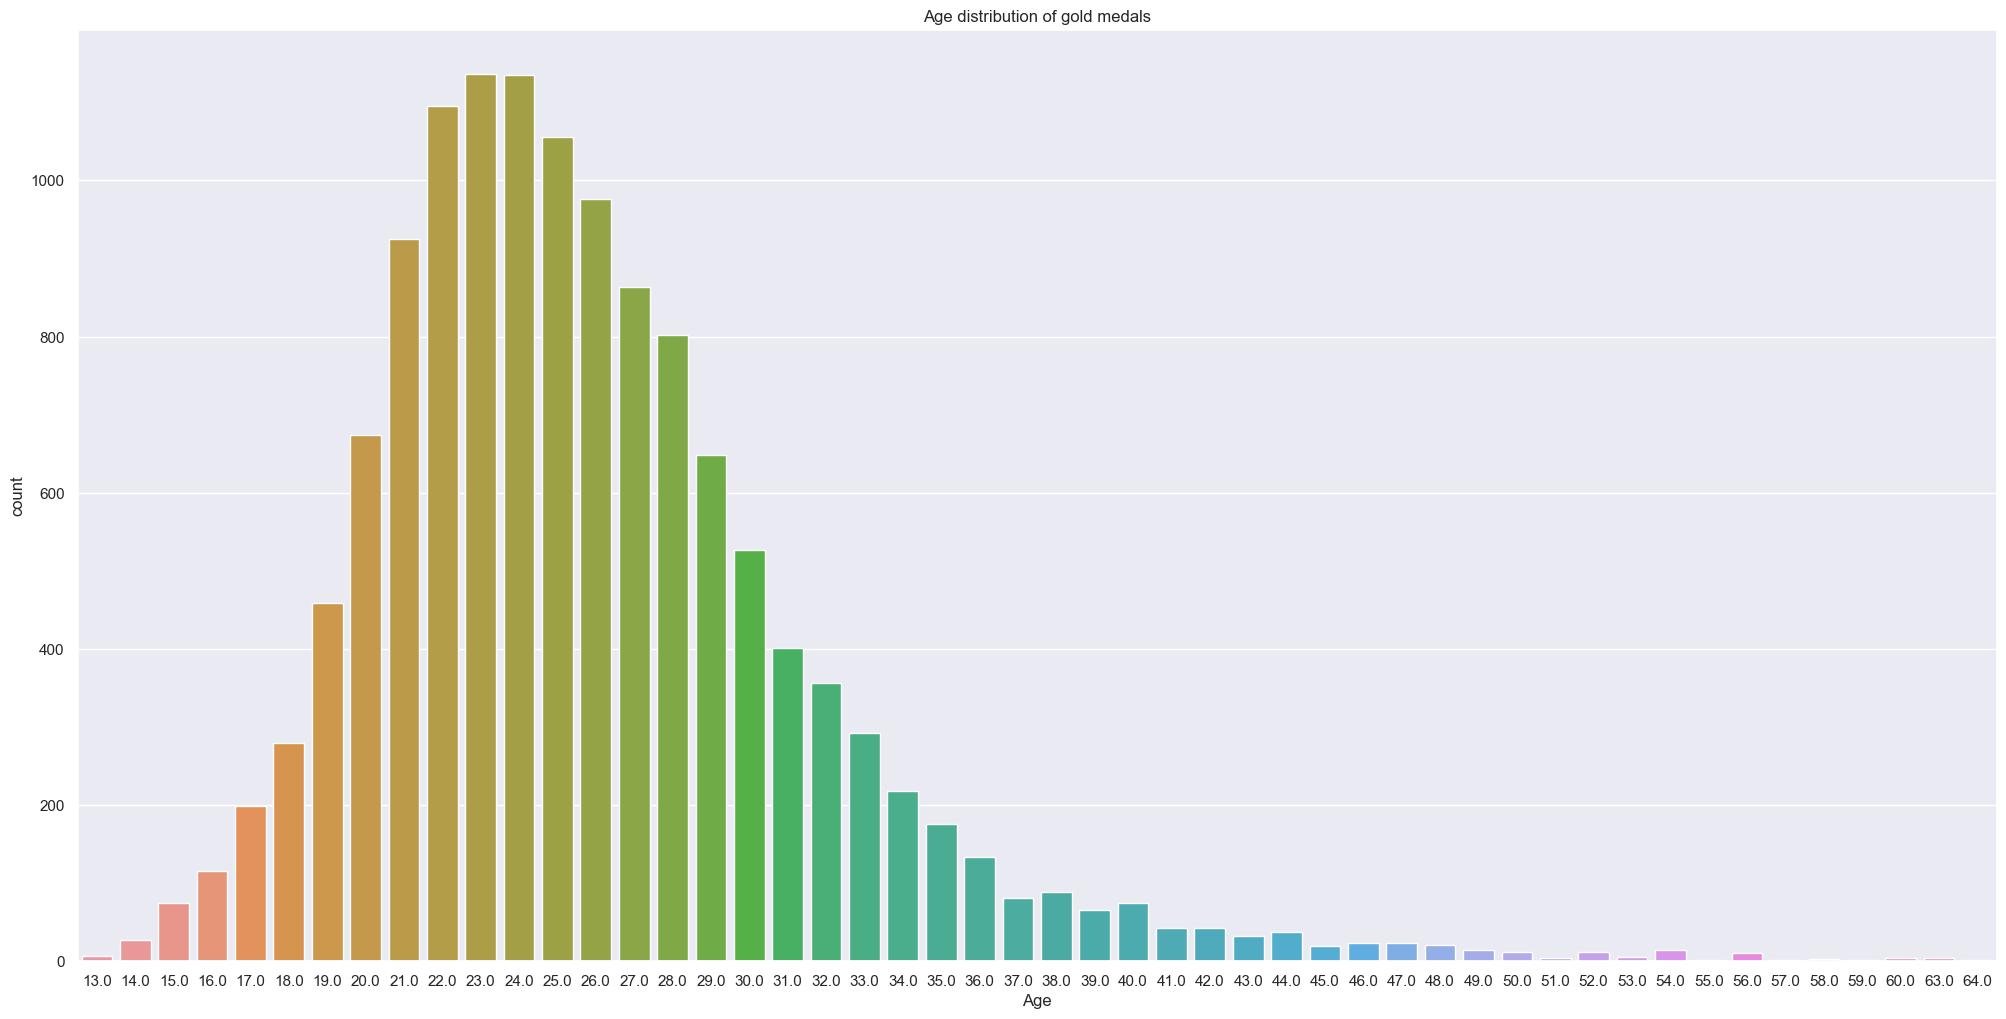

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(20,10))
plt.tight_layout()
sns.countplot(x=gold['Age'])
ax.set_title("Age distribution of gold medals");

In [ ]:
# Female athletes
female_athletes = athlete_regions[(athlete_regions.Sex == 'F') & (athlete_regions.Season == 'Summer')]
female_athletes.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,_merge
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,both
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN,both
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN,both
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN,both
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN,both
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN,both
91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands,NaN,both
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,NaN,both
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN,both
136,49,Moonika Aava,F,28.0,168.0,65.0,Estonia,EST,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN,both


Text(0.5, 1.0, 'Women medals per edition of the Games')

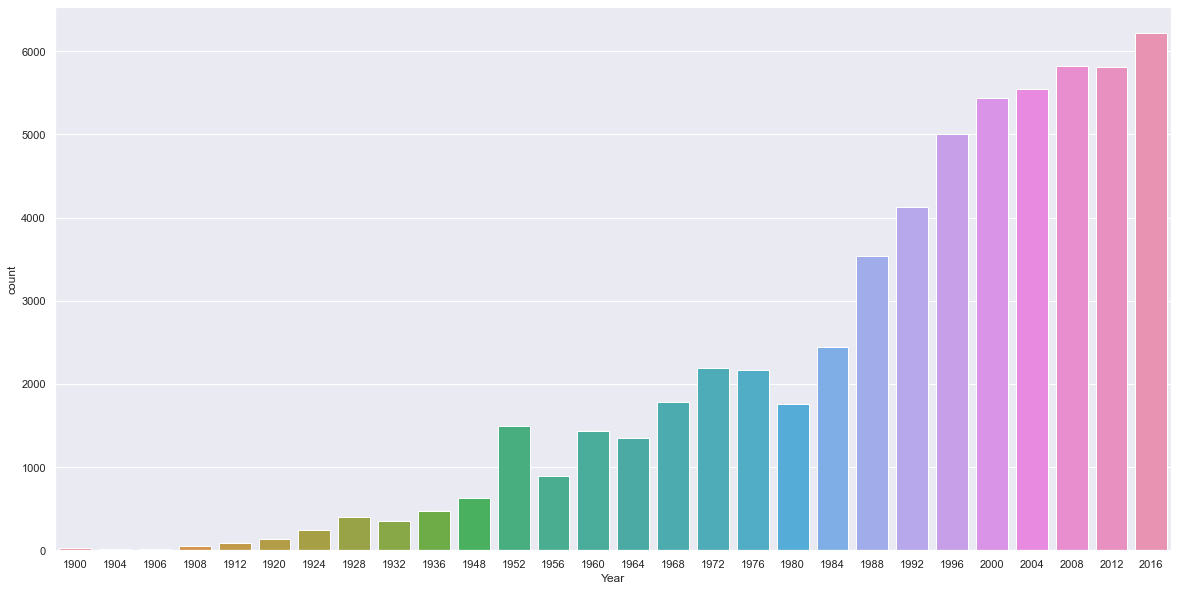

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=female_athletes)
ax.set_title('Women medals per edition of the Games')